In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib as kl
import os
import warnings

os.environ['KERAS_BACKEND']='tensorflow'
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = 'Kaiti'
plt.rcParams['axes.unicode_minus'] = False
PIC_PATH = "../../models/image/image5"
DATA_PATH = '../../data'
RESULT_PATH = '../../data/summary'

In [2]:
def create_dir(file_path):
    if os.path.exists(file_path):
        return
    os.makedirs(file_path)

count = 0

def savefig():
    global count
    count += 1
    PIC_NAME = PIC_PATH + f'/figure{count}.png'
    plt.savefig(PIC_NAME, dpi=800)

In [3]:
create_dir(PIC_PATH)

In [4]:
data = pd.read_excel(RESULT_PATH + '/result4.xlsx', index_col=0)
data

,CreditScore,Gender,Age,Status,AssetStage,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,IsActiveStatus,IsActiveAssetStage,CrCardAssetStage
CustomerId,,,,,,,,,,,,,
15553251,713,1,52,新客户,高资产,1,1,1,46369.57,1,3,9,9
15553256,619,1,41,老客户,低资产,3,1,1,79866.73,1,5,6,6
15553283,603,1,42,老客户,中上资产,1,0,0,144675.30,1,2,2,5
15553308,589,1,61,新客户,低资产,1,1,0,61108.56,1,0,0,0
15553387,687,1,39,新客户,低资产,3,0,0,188150.60,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15815628,711,1,37,老客户,中上资产,1,0,0,80215.20,0,2,2,5
15815645,481,0,37,老客户,高资产,2,1,1,175082.20,0,5,9,9
15815656,541,1,39,老客户,中上资产,1,1,1,199808.10,1,5,8,9


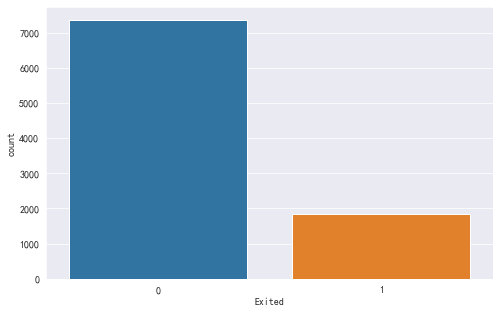

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(data['Exited'])
savefig()

In [6]:
from sklearn.feature_selection import mutual_info_classif

train_column = [col for col in data.columns if col != 'Exited']
target = data['Exited']

In [7]:
MAP = {
    'Status': {
        '新客户': 1,
        '稳定客户': 2,
        '老客户': 3
    },
    'Stage': {
        '低资产': 1,
        '中下资产': 2,
        '中上资产': 3,
        '高资产': 4
    }
}

data['Status'] = data['Status'].map(MAP['Status'])
data['AssetStage'] = data['AssetStage'].map(MAP['Stage'])

data

,CreditScore,Gender,Age,Status,AssetStage,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,IsActiveStatus,IsActiveAssetStage,CrCardAssetStage
CustomerId,,,,,,,,,,,,,
15553251,713,1,52,1,4,1,1,1,46369.57,1,3,9,9
15553256,619,1,41,3,1,3,1,1,79866.73,1,5,6,6
15553283,603,1,42,3,3,1,0,0,144675.30,1,2,2,5
15553308,589,1,61,1,1,1,1,0,61108.56,1,0,0,0
15553387,687,1,39,1,1,3,0,0,188150.60,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15815628,711,1,37,3,3,1,0,0,80215.20,0,2,2,5
15815645,481,0,37,3,4,2,1,1,175082.20,0,5,9,9
15815656,541,1,39,3,3,1,1,1,199808.10,1,5,8,9


In [8]:
import toad

toad.detect(data)

,type,size,missing,unique,mean_or_top1,std_or_top2,min_or_top3,1%_or_top4,10%_or_top5,50%_or_bottom5,75%_or_bottom4,90%_or_bottom3,99%_or_bottom2,max_or_bottom1
CreditScore,int64,9198,0.00%,457,650.311372,96.494541,350.00,432.0000,521.000,651.000,717.00,778.000,850.0000,850.00
Gender,int64,9198,0.00%,2,0.452925,0.497806,0.00,0.0000,0.000,0.000,1.00,1.000,1.0000,1.00
Age,int64,9198,0.00%,70,38.798652,10.672327,1.00,20.0000,27.000,37.000,44.00,53.000,72.0000,92.00
Status,int64,9198,0.00%,3,2.002718,0.837766,1.00,1.0000,1.000,2.000,3.00,3.000,3.0000,3.00
AssetStage,int64,9198,0.00%,4,2.484562,1.274763,1.00,1.0000,1.000,3.000,4.00,4.000,4.0000,4.00
NumOfProducts,int64,9198,0.00%,4,1.530441,0.579166,1.00,1.0000,1.000,1.000,2.00,2.000,3.0000,4.00
HasCrCard,int64,9198,0.00%,2,0.707328,0.455014,0.00,0.0000,0.000,1.000,1.00,1.000,1.0000,1.00
IsActiveMember,int64,9198,0.00%,2,0.515873,0.499775,0.00,0.0000,0.000,1.000,1.00,1.000,1.0000,1.00
EstimatedSalary,float64,9198,0.00%,9197,100188.689862,57592.688450,11.58,1906.5677,20297.814,100438.025,149556.86,179736.941,198069.7835,199992.48
Exited,int64,9198,0.00%,2,0.199717,0.399810,0.00,0.0000,0.000,0.000,0.00,1.000,1.0000,1.00


In [9]:
mutual_info = pd.DataFrame(index=train_column)

info = []
for i in train_column:
    info.append(mutual_info_classif(data[[i]].to_numpy(), target.to_numpy())[0])

mutual_info['info'] = info
mutual_info

,info
CreditScore,0.001395
Gender,0.003151
Age,0.072275
Status,0.000000
AssetStage,0.004084
NumOfProducts,0.072441
HasCrCard,0.000000
IsActiveMember,0.013885
EstimatedSalary,0.004438
IsActiveStatus,0.010538


In [10]:
quality = toad.quality(data, 'Exited')
quality

,iv,gini,entropy,unique
NumOfProducts,0.968075,0.271939,0.430435,4.0
Age,0.875715,0.285042,0.500010,70.0
IsActiveAssetStage,0.257038,0.306751,0.479883,8.0
CrCardAssetStage,0.255845,0.306841,0.479988,6.0
IsActiveStatus,0.159380,0.311710,0.487441,6.0
IsActiveMember,0.155265,0.311883,0.487741,2.0
AssetStage,0.098241,0.314896,0.492325,4.0
CreditScore,0.073032,0.318176,0.500010,457.0
Gender,0.071524,0.315996,0.494301,2.0
EstimatedSalary,0.037302,0.319467,0.500010,9197.0


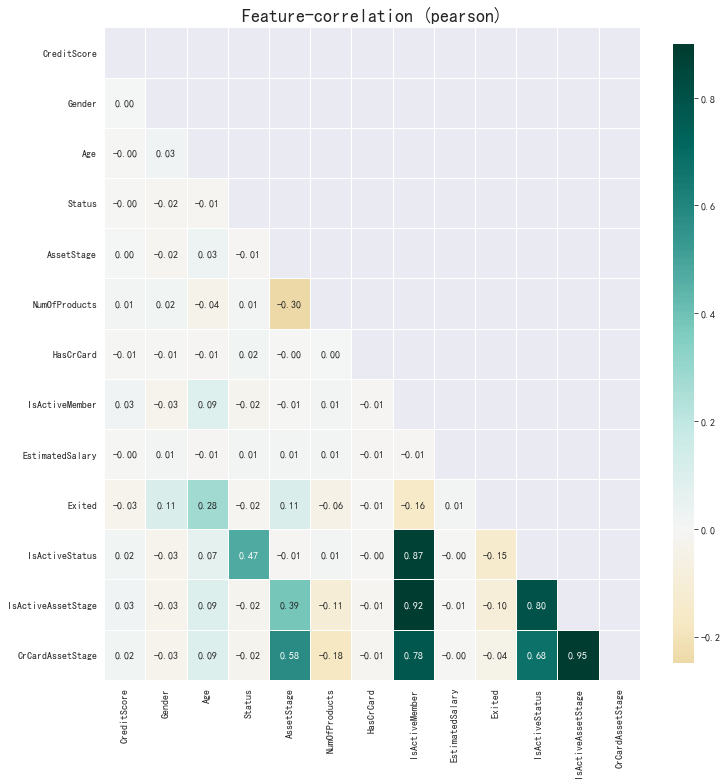

In [11]:
kl.corr_plot(data, figsize=(12, 12))
savefig()

In [12]:
train_select, drop = toad.selection.select(data, target='Exited',
                                           empty=.5, iv=0, corr=.7, return_drop=True)
drop

{'empty': array([], dtype=float64),
 'iv': array([], dtype=object),
 'corr': array(['IsActiveMember', 'IsActiveAssetStage'], dtype=object)}

In [13]:
train_select.drop(['HasCrCard', 'Status', 'Gender', 'CreditScore'], axis=1, inplace=True)

In [14]:
train_select

,Age,AssetStage,NumOfProducts,EstimatedSalary,Exited,IsActiveStatus,CrCardAssetStage
CustomerId,,,,,,,
15553251,52,4,1,46369.57,1,3,9
15553256,41,1,3,79866.73,1,5,6
15553283,42,3,1,144675.30,1,2,5
15553308,61,1,1,61108.56,1,0,0
15553387,39,1,3,188150.60,1,0,0
...,...,...,...,...,...,...,...
15815628,37,3,1,80215.20,0,2,5
15815645,37,4,2,175082.20,0,5,9
15815656,39,3,1,199808.10,1,5,9


<Figure size 864x648 with 0 Axes>

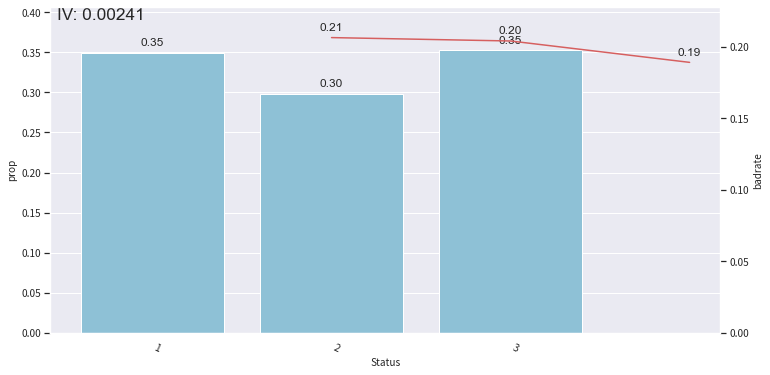

In [15]:
from toad.plot import bin_plot, badrate_plot

plt.figure(figsize=(12, 9))
bin_plot(data[['Status', 'Exited']], target='Exited', x='Status')
savefig()

<Figure size 864x504 with 0 Axes>

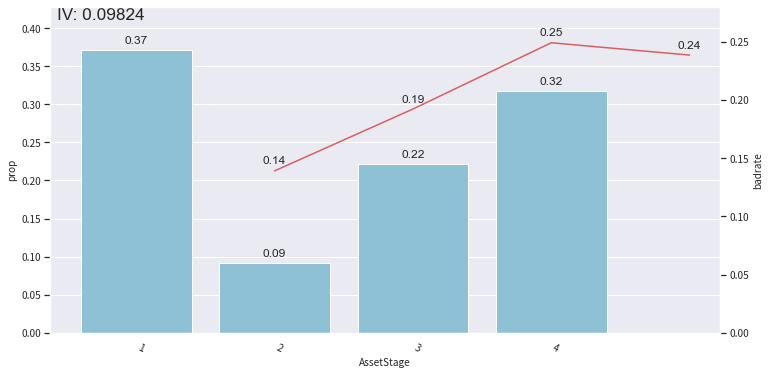

In [16]:
plt.figure(figsize=(12, 7))
bin_plot(data, target='Exited', x='AssetStage')
savefig()

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_select.drop('Exited', axis=1), target,
                                                    test_size=.3, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7938405797101449

In [18]:
proba = lr.predict_proba(X_train)[:, 1].reshape(-1, 1)
test_proba = lr.predict_proba(X_test)[:, 1].reshape(-1, 1)
lr.fit(proba, y_train)
lr.score(test_proba, y_test)

0.7938405797101449

In [19]:
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [20]:
def create_model(model):
    model.fit(X_train, y_train)
    print(model.score(X_test, y_test))
    print(f1_score(
        y_test, model.predict(X_test), average='micro'
    ))
    print(roc_auc_score(
        y_test, model.predict(X_test)
    ))
    print()

In [21]:
for model in [XGBClassifier(), XGBRFClassifier(), LGBMClassifier(), RandomForestClassifier(),
              AdaBoostClassifier()]:
    print(model)
    create_model(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)
0.8452898550724638
0.8452898550724639
0.6930857903277428

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None,
                early_stopping_rounds=None, enable_categorical=False,
     

In [22]:
best_model = XGBRFClassifier()
best_model.fit(X_train, y_train)

confusion_matrix(y_test, best_model.predict(X_test))

array([[2125,   66],
       [ 353,  216]], dtype=int64)

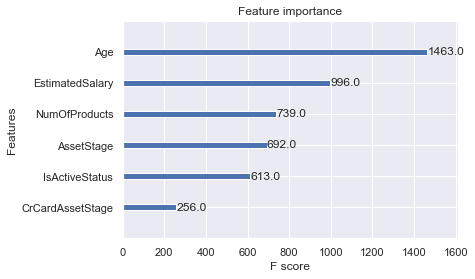

In [23]:
from xgboost.plotting import plot_tree, plot_importance

plot_importance(best_model)
savefig()

In [24]:
import shap

X = train_select.drop('Exited', axis=1)
explainer = shap.TreeExplainer(best_model)
shap_value = explainer.shap_values(X)
shap_value2 = explainer(X)

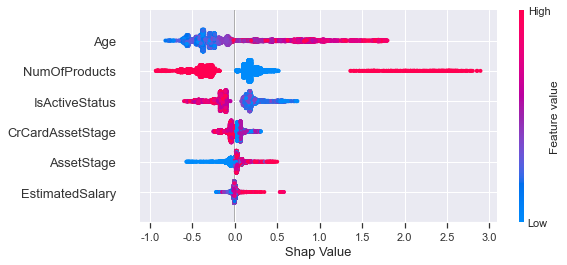

In [25]:
plt.figure(figsize=(16, 9))
shap.summary_plot(shap_value, X, show=False)
plt.xlabel('Shap Value')
savefig()

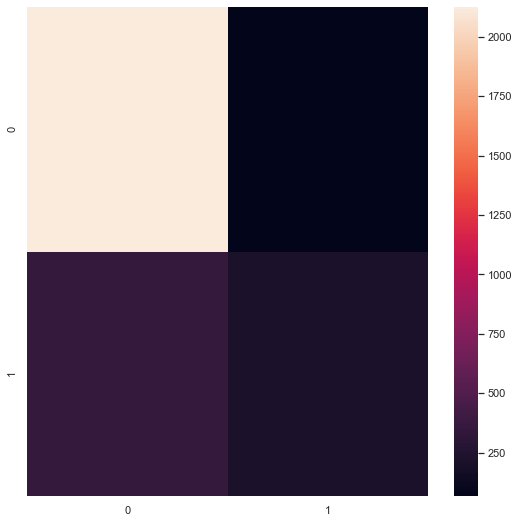

In [26]:
plt.figure(figsize=(9, 9))
sns.heatmap(confusion_matrix(y_test, best_model.predict(X_test)))
savefig()

In [27]:
import joblib

joblib.dump(best_model, './bestmodel.model')

['./bestmodel.model']

In [28]:
test_data = pd.read_csv(DATA_PATH + '/long-customer-test.csv')
test_data

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15647311,608,1,41,1,83807.86,1,0,1,112542.58
1,15737452,653,0,58,1,132602.88,1,1,0,5097.67
2,15577657,732,0,41,8,0.00,2,1,1,170886.17
3,15589475,591,1,39,3,0.00,3,1,0,140469.38
4,15687946,556,1,61,2,117419.35,1,1,1,94153.83
...,...,...,...,...,...,...,...,...,...,...
995,15732202,615,0,34,1,83503.11,2,1,1,73124.53
996,15735078,724,1,53,1,139687.66,2,1,1,12913.92
997,15707861,520,1,46,10,85216.61,1,1,0,117369.52
998,15594612,702,0,44,9,0.00,1,0,0,59207.41


In [29]:
test_data.rename(columns={
        'Tenure': 'Status',
        'Balance': 'AssetStage'
    }, inplace=True)
test_data

,CustomerId,CreditScore,Gender,Age,Status,AssetStage,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15647311,608,1,41,1,83807.86,1,0,1,112542.58
1,15737452,653,0,58,1,132602.88,1,1,0,5097.67
2,15577657,732,0,41,8,0.00,2,1,1,170886.17
3,15589475,591,1,39,3,0.00,3,1,0,140469.38
4,15687946,556,1,61,2,117419.35,1,1,1,94153.83
...,...,...,...,...,...,...,...,...,...,...
995,15732202,615,0,34,1,83503.11,2,1,1,73124.53
996,15735078,724,1,53,1,139687.66,2,1,1,12913.92
997,15707861,520,1,46,10,85216.61,1,1,0,117369.52
998,15594612,702,0,44,9,0.00,1,0,0,59207.41


In [30]:
bin_tenure = [0, 3, 6, 11]
labels = ['新客户', '稳定客户', '老客户']
box1 = pd.cut(test_data['Status'], bins=bin_tenure, labels=labels, include_lowest=True, right=True)
test_data['Status'] = box1

bin_balance = [0, 50000, 90000, 120000, 260000]
labels = ['低资产', '中下资产', '中上资产', '高资产']
box2 = pd.cut(test_data['AssetStage'], bins=bin_balance, labels=labels, include_lowest=True, right=True)
test_data['AssetStage'] = box2

test_data

,CustomerId,CreditScore,Gender,Age,Status,AssetStage,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15647311,608,1,41,新客户,中下资产,1,0,1,112542.58
1,15737452,653,0,58,新客户,高资产,1,1,0,5097.67
2,15577657,732,0,41,老客户,低资产,2,1,1,170886.17
3,15589475,591,1,39,新客户,低资产,3,1,0,140469.38
4,15687946,556,1,61,新客户,中上资产,1,1,1,94153.83
...,...,...,...,...,...,...,...,...,...,...
995,15732202,615,0,34,新客户,中下资产,2,1,1,73124.53
996,15735078,724,1,53,新客户,高资产,2,1,1,12913.92
997,15707861,520,1,46,老客户,中下资产,1,1,0,117369.52
998,15594612,702,0,44,老客户,低资产,1,0,0,59207.41


In [31]:
MAP = {
    'is_active': {
        'Status': {
            '新客户': 3,
            '稳定客户': 4,
            '老客户': 5,
        },
        'Asset': {
            '低资产': 6,
            '中下资产': 7,
            '中上资产': 8,
            '高资产': 9
        },
        'Card': {
            '低资产': 6,
            '中下资产': 7,
            '中上资产': 9,
            '高资产': 9
        },
    },
    'not_active': {
        'Status': {
            '新客户': 0,
            '稳定客户': 1,
            '老客户': 2,
        },
        'Asset': {
            '低资产': 0,
            '中下资产': 1,
            '中上资产': 2,
            '高资产': 3
        },
        'Card': {
            '低资产': 0,
            '中下资产': 2,
            '中上资产': 5,
            '高资产': 5
        },
    }
}

In [32]:
active_group = test_data.groupby('IsActiveMember')
test_data['IsActiveStatus'] = np.nan

In [33]:
active = test_data[test_data['IsActiveMember'] == 1]
# test_data['IsActiveStatus'].loc[active.index] = active['Status'].map(MAP['is_active']['Status'])
#
# test_data
active

,CustomerId,CreditScore,Gender,Age,Status,AssetStage,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,IsActiveStatus
0,15647311,608,1,41,新客户,中下资产,1,0,1,112542.58,NaN
2,15577657,732,0,41,老客户,低资产,2,1,1,170886.17,NaN
4,15687946,556,1,61,新客户,中上资产,1,1,1,94153.83,NaN
7,15701164,506,1,34,稳定客户,中上资产,1,1,1,159235.29,NaN
8,15738721,773,0,41,老客户,中上资产,1,0,1,64595.25,NaN
...,...,...,...,...,...,...,...,...,...,...,...
990,15726179,757,1,43,稳定客户,高资产,2,1,1,3497.43,NaN
994,15784042,624,0,55,老客户,中上资产,1,1,1,95022.02,NaN
995,15732202,615,0,34,新客户,中下资产,2,1,1,73124.53,NaN
996,15735078,724,1,53,新客户,高资产,2,1,1,12913.92,NaN


In [34]:
active['IsActiveStatus'] = active['Status'].map(MAP['is_active']['Status'])
active['IsActiveAssetStage'] = active['AssetStage'].map(MAP['is_active']['Asset'])
active['CrCardAssetStage'] = active['AssetStage'].map(MAP['not_active']['Card'])
active

,CustomerId,CreditScore,Gender,Age,Status,AssetStage,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,IsActiveStatus,IsActiveAssetStage,CrCardAssetStage
0,15647311,608,1,41,新客户,中下资产,1,0,1,112542.58,3,7,2
2,15577657,732,0,41,老客户,低资产,2,1,1,170886.17,5,6,0
4,15687946,556,1,61,新客户,中上资产,1,1,1,94153.83,3,8,5
7,15701164,506,1,34,稳定客户,中上资产,1,1,1,159235.29,4,8,5
8,15738721,773,0,41,老客户,中上资产,1,0,1,64595.25,5,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,15726179,757,1,43,稳定客户,高资产,2,1,1,3497.43,4,9,5
994,15784042,624,0,55,老客户,中上资产,1,1,1,95022.02,5,8,5
995,15732202,615,0,34,新客户,中下资产,2,1,1,73124.53,3,7,2
996,15735078,724,1,53,新客户,高资产,2,1,1,12913.92,3,9,5


In [35]:
not_active = test_data[test_data['IsActiveMember'] == 0]
not_active['IsActiveStatus'] = not_active['Status'].map(MAP['is_active']['Status'])
not_active['IsActiveAssetStage'] = not_active['AssetStage'].map(MAP['not_active']['Asset'])
not_active['CrCardAssetStage'] = not_active['AssetStage'].map(MAP['not_active']['Card'])
# test_data['IsActiveStatus'].loc[active.index] = active['Status'].map(MAP['is_active']['Status'])
#
# test_data
active_ = pd.concat([active, not_active])
active_

,CustomerId,CreditScore,Gender,Age,Status,AssetStage,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,IsActiveStatus,IsActiveAssetStage,CrCardAssetStage
0,15647311,608,1,41,新客户,中下资产,1,0,1,112542.58,3,7,2
2,15577657,732,0,41,老客户,低资产,2,1,1,170886.17,5,6,0
4,15687946,556,1,61,新客户,中上资产,1,1,1,94153.83,3,8,5
7,15701164,506,1,34,稳定客户,中上资产,1,1,1,159235.29,4,8,5
8,15738721,773,0,41,老客户,中上资产,1,0,1,64595.25,5,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,15632446,667,0,24,稳定客户,低资产,2,0,0,180329.83,4,0,0
992,15669414,486,0,62,老客户,中上资产,2,1,0,168034.83,5,2,5
993,15746569,589,0,38,稳定客户,低资产,1,1,0,95483.48,4,0,0
997,15707861,520,1,46,老客户,中下资产,1,1,0,117369.52,5,1,2


In [36]:
active_.sort_index(inplace=True)
active_

,CustomerId,CreditScore,Gender,Age,Status,AssetStage,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,IsActiveStatus,IsActiveAssetStage,CrCardAssetStage
0,15647311,608,1,41,新客户,中下资产,1,0,1,112542.58,3,7,2
1,15737452,653,0,58,新客户,高资产,1,1,0,5097.67,3,3,5
2,15577657,732,0,41,老客户,低资产,2,1,1,170886.17,5,6,0
3,15589475,591,1,39,新客户,低资产,3,1,0,140469.38,3,0,0
4,15687946,556,1,61,新客户,中上资产,1,1,1,94153.83,3,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,15732202,615,0,34,新客户,中下资产,2,1,1,73124.53,3,7,2
996,15735078,724,1,53,新客户,高资产,2,1,1,12913.92,3,9,5
997,15707861,520,1,46,老客户,中下资产,1,1,0,117369.52,5,1,2
998,15594612,702,0,44,老客户,低资产,1,0,0,59207.41,5,0,0


In [37]:

data = active_[X.columns]

In [41]:
data

,Age,AssetStage,NumOfProducts,EstimatedSalary,IsActiveStatus,CrCardAssetStage
0,41,中下资产,1,112542.58,3,2
1,58,高资产,1,5097.67,3,5
2,41,低资产,2,170886.17,5,0
3,39,低资产,3,140469.38,3,0
4,61,中上资产,1,94153.83,3,5
...,...,...,...,...,...,...
995,34,中下资产,2,73124.53,3,2
996,53,高资产,2,12913.92,3,5
997,46,中下资产,1,117369.52,5,2
998,44,低资产,1,59207.41,5,0


In [42]:
MAP = {
    'Status': {
        '新客户': 1,
        '稳定客户': 2,
        '老客户': 3
    },
    'Stage': {
        '低资产': 1,
        '中下资产': 2,
        '中上资产': 3,
        '高资产': 4
    }
}

data['AssetStage'] = data['AssetStage'].map(MAP['Stage'])

data

,Age,AssetStage,NumOfProducts,EstimatedSalary,IsActiveStatus,CrCardAssetStage
0,41,2,1,112542.58,3,2
1,58,4,1,5097.67,3,5
2,41,1,2,170886.17,5,0
3,39,1,3,140469.38,3,0
4,61,3,1,94153.83,3,5
...,...,...,...,...,...,...
995,34,2,2,73124.53,3,2
996,53,4,2,12913.92,3,5
997,46,2,1,117369.52,5,2
998,44,1,1,59207.41,5,0


In [44]:
data['Exited'] = best_model.predict(data.to_numpy())

In [45]:
data.to_excel(RESULT_PATH + '/result5.xlsx')